# 2. Exploratory Data Analysis - Sales Forecast

## Contents
- 2.1 [Introduction](#3.1Introduction)
- 2.2 [Import, Load, Explore](#3.2-Import,Load,Explore)
   - 2.2.1 [Quantity](#3.2.1.Quantity)
   - 2.2.2 [Unit Price](#3.2.2.UnitPrice)
   - 2.2.3 [Stock Code](#3.2.3.StockCode)
   - 2.2.4 [Customer ID](#3.2.4.CustomerID)
   - 2.2.5 [Country](#3.2.5.Country)  
- 2.3 [Exploring Temproral Pattern](#3.3.ExploringTemproralPattern)
- 2.4 [Subset & analyze](#3.4.Subset&analyze)
- 2.5 [Summary](#3.5.Summary)


## 2.1 Introduction <a id="3.1Introduction"></a>
In this phase, I'll explore various aspects, trends, patterns and relationships related to the term deposit subscription by performing the following:
* Explore each variable. 
* Explore trends & patterns in time.
* Subset the data and analyze the subset.

## 2.2 Import, Load, Explore <a id="3.2-Import,Load,Explore"></a>


In [1]:
#Importing relevant libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")


In [2]:
#Loading clean data

data = pd.read_csv("sales_cleaned_data.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
539108,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
539109,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
539110,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
539111,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1449
Quantity            0
InvoiceDate         0
UnitPrice        2501
CustomerID     134070
Country             0
dtype: int64

In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,539113.000000,536612.000000,405043.000000
mean,9.583215,3.297468,15294.933113
std,218.591696,4.565574,1710.236120
min,-80995.000000,0.030000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


In [5]:
data['InvoiceNo'].nunique()

25303

#### 2.2.1. Quantity <a id="3.2.1.Quantity"></a>

In [6]:
data['Quantity'].sum()

5166436

In [7]:
data['Quantity'].describe()

count    539113.000000
mean          9.583215
std         218.591696
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

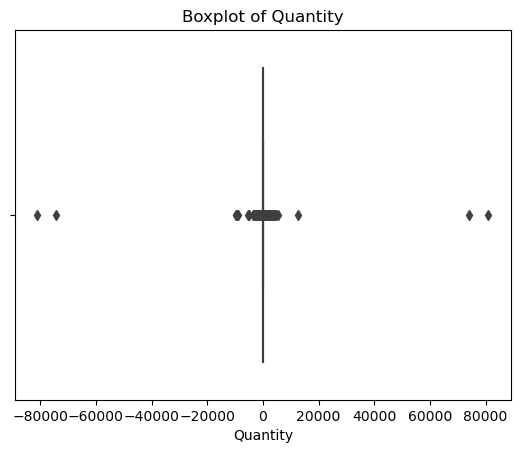

In [8]:
sns.boxplot(x='Quantity', data=data)
plt.xlabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()

In [9]:
data[data['Quantity'] >= 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61349,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
499460,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,NaN,13256.0,United Kingdom
537633,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


#### 2.2.2. Unit Price <a id="3.2.2.UnitPrice"></a>

In [10]:
data['UnitPrice'].describe()

count    536612.000000
mean          3.297468
std           4.565574
min           0.030000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

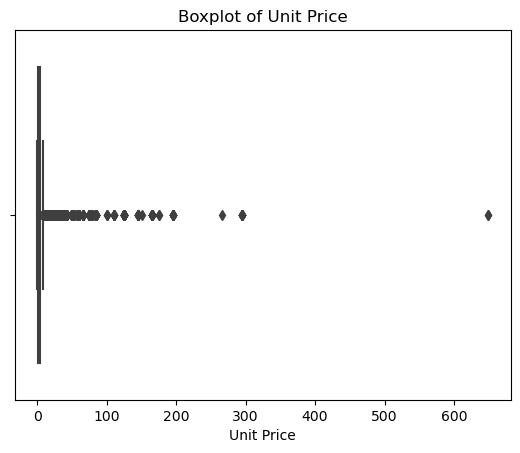

In [11]:
sns.boxplot(x='UnitPrice', data=data)
plt.xlabel('Unit Price')
plt.title('Boxplot of Unit Price')
plt.show()

#### 2.2.3. Stock Code <a id="3.2.3.StockCode"></a>

In [12]:
#Which product is the most popular?
data['StockCode'].nunique()

4057

In [13]:
data['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85226C       1
85110        1
85179B       1
90000C       1
47591A       1
Name: count, Length: 4057, dtype: int64

In [14]:
data.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)

StockCode
22197      56450
84077      53847
85099B     47363
85123A     38830
84879      36221
           ...  
79323LP    -2618
79323W     -4838
72140F     -5368
23003      -8516
23005     -14418
Name: Quantity, Length: 4057, dtype: int64

In [15]:
data[data['StockCode'] == '22197']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219,536390,22197,SMALL POPCORN HOLDER,100,2010-12-01 10:19:00,0.72,17511.0,United Kingdom
390,536404,22197,SMALL POPCORN HOLDER,36,2010-12-01 11:29:00,0.85,16218.0,United Kingdom
529,536409,22197,SMALL POPCORN HOLDER,2,2010-12-01 11:45:00,0.85,17908.0,United Kingdom
607,536412,22197,SMALL POPCORN HOLDER,5,2010-12-01 11:49:00,0.85,17920.0,United Kingdom
801,536464,22197,SMALL POPCORN HOLDER,5,2010-12-01 12:23:00,0.85,17968.0,United Kingdom
...,...,...,...,...,...,...,...,...
537533,581476,22197,POPCORN HOLDER,100,2011-12-09 08:48:00,0.72,12433.0,Norway
537997,581492,22197,POPCORN HOLDER,34,2011-12-09 10:03:00,1.63,NaN,United Kingdom
538494,581497,22197,POPCORN HOLDER,68,2011-12-09 10:23:00,2.46,NaN,United Kingdom
538885,581538,22197,POPCORN HOLDER,4,2011-12-09 11:34:00,0.85,14446.0,United Kingdom


In [16]:
data[data['StockCode'] == '85123A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
48,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
65,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
218,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
260,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
536555,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,NaN,United Kingdom
537191,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom
537429,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796.0,United Kingdom
538049,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,NaN,United Kingdom


#### 2.2.4. Customer ID <a id="3.2.4.CustomerID"></a>

In [17]:
data['CustomerID'].dtype

dtype('float64')

In [18]:
data['CustomerID'] = data['CustomerID'].astype(str)
data['CustomerID'] = data['CustomerID'].str.replace('\.0', '', regex=True)

data['CustomerID'] = data['CustomerID'].astype('object')

In [19]:
data.describe()

,Quantity,UnitPrice
count,539113.000000,536612.000000
mean,9.583215,3.297468
std,218.591696,4.565574
min,-80995.000000,0.030000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,649.500000


In [20]:
data['CustomerID'].nunique()

4364

#### 2.2.5. Country <a id="3.2.5.Country"></a>

In [21]:
data['Country'].nunique()

38

By observing each variables we can see that:

* There had been 25,900 purchases made over the course of the year.

* There had been a total of 5,176,450 individual items sold  over the course of the year. While the average number of products sold at once (with a single invoice) is approximately 10, the minimum and maximum values are extreme and clearly outliers but they may be valid data points.

* There are 4,070 types of products sold in the year. Of those products the 'POPCORN HOLDER' (stock code = 22197) is the the most popular product thats usually sold in bulk. And the 'HANGING HEART T-LIGHT HOLDER' (stock code = 85123A) was sold most frequently but not in bulk.

* The store had 4372 customers located across 38 countries who purchased at least 1 product over the year.



## 2.3 Exploring Patterns in time
<a id="3.3.ExploringTemproralPattern"></a>

In [22]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [23]:
data['Months'] = data['InvoiceDate'].dt.month
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
539108,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12
539109,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12
539110,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12
539111,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12


In [24]:
#Since the data is a record of sales from December 1, 2010 to December 9, 2011,
#the data points in December may be over represented.

data = data[data['InvoiceDate'] < '2011-12-01 08:00:00']

In [25]:
Monthly_sales = pd.DataFrame(data['Quantity'].groupby(data['Months']).sum())
Monthly_sales

,Quantity
Months,
1,307672
2,277950
3,351490
4,288851
5,381056
6,341399
7,390780
8,406563
9,548554


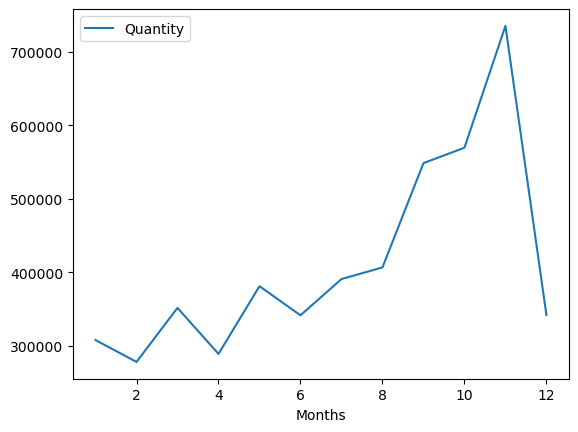

In [26]:
Monthly_sales.plot()
plt.show()

In [27]:
data['DayOfMonth'] = data['InvoiceDate'].dt.day
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
start_date = data['InvoiceDate'].min()
data['WeekOfYear'] = (((data['InvoiceDate'] - start_date).dt.days)/7).astype(int)

DayOfMonth = pd.DataFrame(data['Quantity'].groupby(data['DayOfMonth']).sum())

DayOfWeek = pd.DataFrame(data['Quantity'].groupby(data['DayOfWeek']).sum())

WeekOfYear  = pd.DataFrame(data['Quantity'].groupby(data['WeekOfYear']).sum())

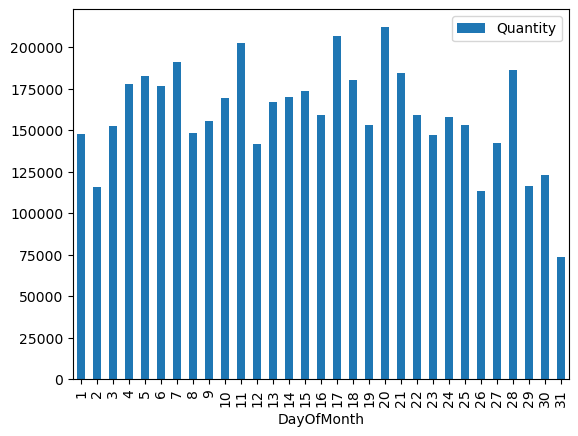

In [28]:
DayOfMonth.plot(kind = 'bar')

plt.show()

In [29]:
DayOfWeek

,Quantity
DayOfWeek,
0,768418
1,929168
2,928783
3,1106701
4,752916
6,455048


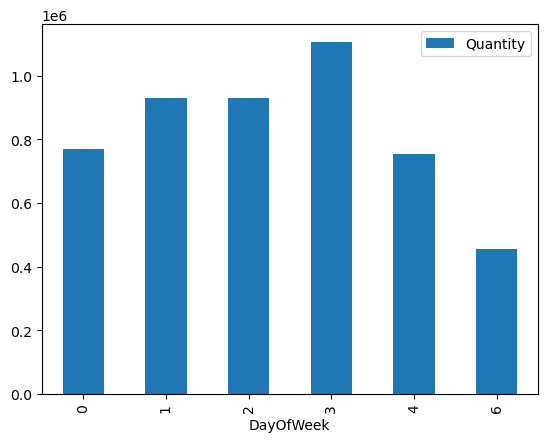

In [30]:
DayOfWeek.plot(kind = 'bar')

plt.show()

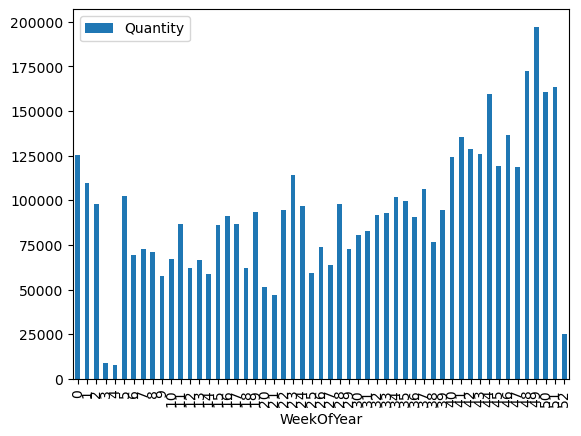

In [31]:
WeekOfYear.plot(kind = 'bar')
plt.show()

* By extracting the month and grouping th data based on month, the data shows that, sales was lower in the first few months before sharply increasing after in the month of september and sharply decreasing after it peaks in November. We can clearly see that the month of November had far more sales than the rest of the months.
* The lowest sales month was February, while the highest sales month was November.
* There is no obvious day of the month effect, but there is a slight decrease in sales towards the ends of the months.
* There is not particular day in the week that shows a higher difference in sales, however, Thursdays show to have slightly higher sales than the rest of the week and oddly there is not a single sale made on a Saturdays.
* We can also see the gap in sales between Dec 24, 2010 and Jan 4, 2011 that was seen in the data wrangling phase.


### 2.4 Subset ths Data   <a id="3.4.Subset&analyze"></a>  

In [32]:
# I'll subset the top 5 most popular products.
top_pdcts = pd.DataFrame(data.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False))
top5 = top_pdcts.head(5)
top5

,Quantity
StockCode,
84077,52480
22197,50252
85099B,46273
85123A,38016
21212,35580


In [33]:
print(f'The top 5 most popular products account for {(top5["Quantity"].sum()/data["Quantity"].sum())*100} of the total  sales')

The top 5 most popular products account for 4.505150136590843 of the total  sales


In [34]:
stock_codes = ['84077', '22197', '85099B', '85123A', '21212']
subset_list = []

for code in stock_codes:
    subset_data = data[data['StockCode'] == code]
    subset_list.append(subset_data)

subset = pd.concat(subset_list, ignore_index=True)
subset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Months,DayOfMonth,DayOfWeek,WeekOfYear
0,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047,United Kingdom,12,2,3,0
1,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017,United Kingdom,12,2,3,0
2,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,12,2,3,0
3,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093,United Kingdom,12,2,3,0
4,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370,United Kingdom,12,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7612,579561,21212,PACK OF 72 RETROSPOT CAKE CASES,6,2011-11-30 11:32:00,0.55,16115,United Kingdom,11,30,2,52
7613,579600,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-11-30 12:00:00,0.55,13647,United Kingdom,11,30,2,52
7614,579634,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-11-30 12:18:00,0.55,12598,France,11,30,2,52
7615,579672,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2011-11-30 12:41:00,0.42,14005,United Kingdom,11,30,2,52


In [35]:
subset_data = subset[['InvoiceDate', 'Quantity']]
subset_data

,InvoiceDate,Quantity
0,2010-12-02 10:09:00,48
1,2010-12-02 10:17:00,48
2,2010-12-02 17:38:00,2880
3,2010-12-02 18:25:00,288
4,2010-12-03 10:26:00,48
...,...,...
7612,2011-11-30 11:32:00,6
7613,2011-11-30 12:00:00,24
7614,2011-11-30 12:18:00,24
7615,2011-11-30 12:41:00,120


In [36]:
subset_data = subset_data.set_index('InvoiceDate')

<Axes: xlabel='InvoiceDate'>

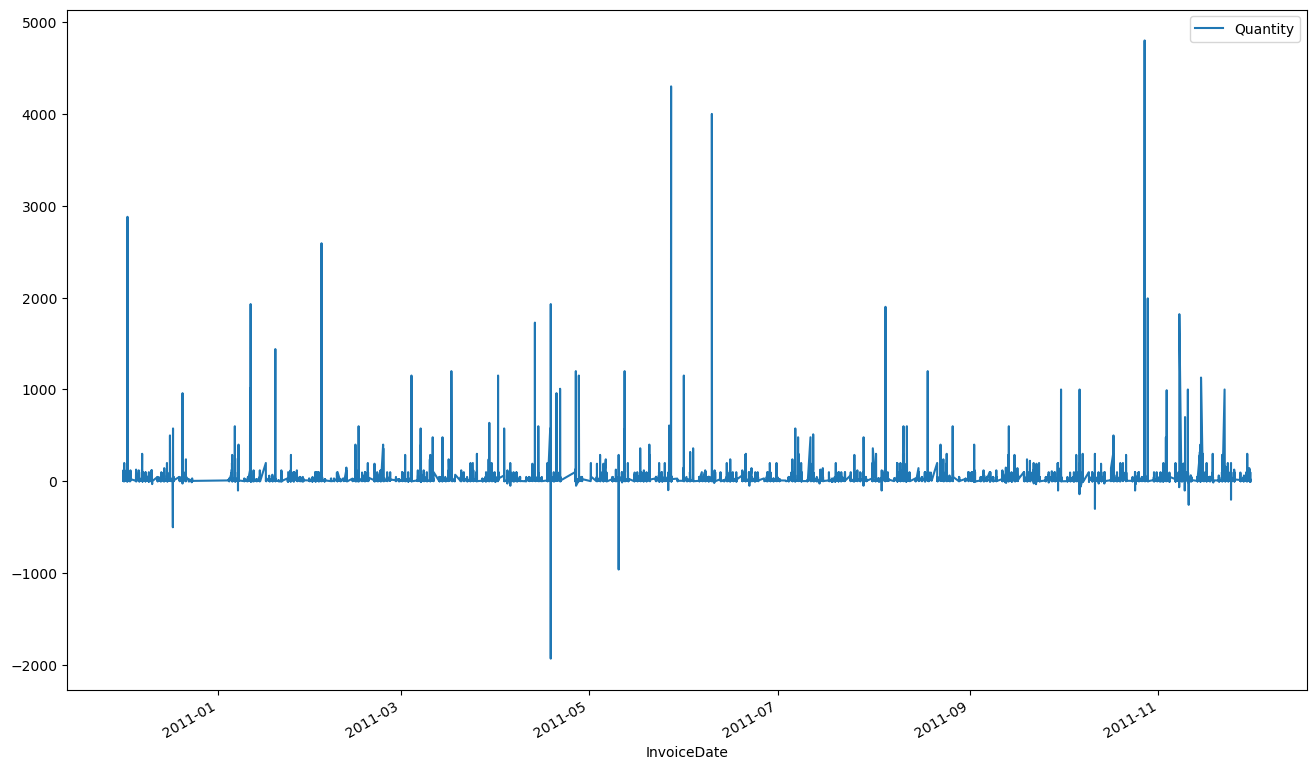

In [37]:
subset_data.plot(figsize = (16,10))

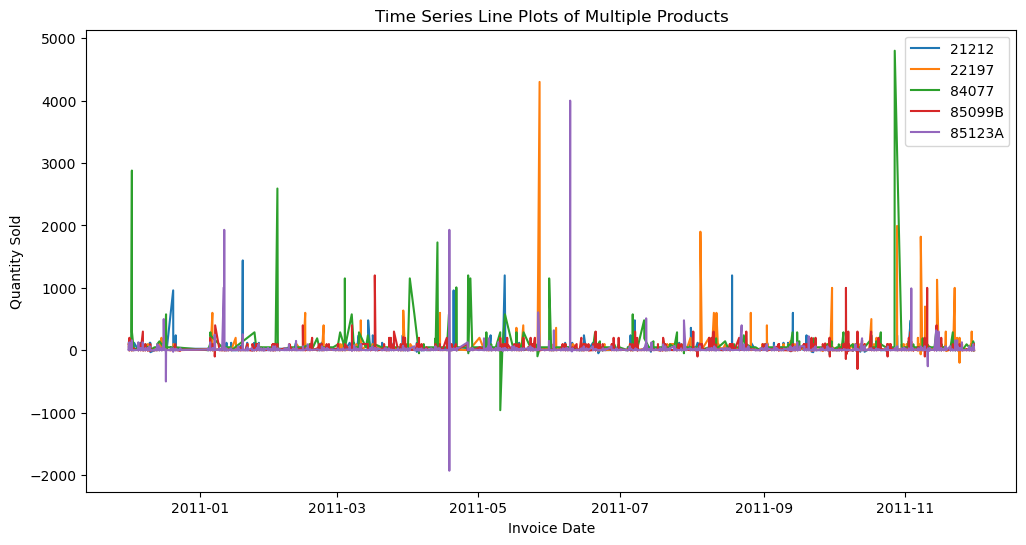

In [38]:
products_to_plot = ['84077', '22197', '85099B', '85123A', '21212']

subset_data = data[data['StockCode'].isin(products_to_plot)]

grouped_data = subset_data.groupby('StockCode')

plt.figure(figsize=(12, 6))
for name, group in grouped_data:
    plt.plot(group['InvoiceDate'], group['Quantity'], label=name)
plt.xlabel('Invoice Date')
plt.ylabel('Quantity Sold')
plt.title('Time Series Line Plots of Multiple Products')
plt.legend()
plt.show()


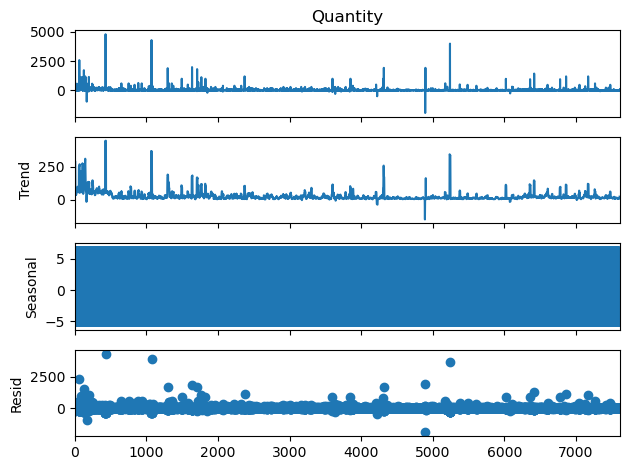

In [39]:
result = seasonal_decompose(subset['Quantity'], model='additive', period=12)

result.plot()
plt.show()

* After subseting the top 5 most popular products, ...The top 5 most popular products account for 4.505150136590843 of the total  sales.
* Looking at the plot of the 5 pdcts through time, we can see that product `84077` has frequent peaks over the year with the highest being in November, product `22197` also has frequent peaks with the highest in June.
* Product `85099B` and `21212` seem stable all through out the year.
* And product `85123A` has the highest returns (-negative value for sales/quantity) in April.
* The data shows neither increasing of decreasing trend. There is no seasonality or a repeating pattern observed in regular intervals.


### 2.5 Summary <a id="3.5.Summary"></a>

#### Initial observation:

In the intitial observation we can see that, throughout the year, the online store recorded a substantial number of transactions, totaling 25,900 purchases. These purchases comprised of 5,176,450 individual items sold. On average, around 10 items were sold per invoice, but the data also showsed extreme outliers in both the minimum and maximum values, that are potentially valid. Among the 4,070 product types sold, the 'POPCORN HOLDER' (stock code = 22197) was the most popular product often sold in bulk, while the 'HANGING HEART T-LIGHT HOLDER' (stock code = 85123A) was frequently sold but not typically in bulk quantities. The store served a customer base of 4,372 individuals across 38 countries, each making at least one purchase throughout the year.

#### Sales Pattern in time

The sales data, grouped by month, shows a gradual rise in sales after a slow start in the earlier months, followed by a substantial surge in September, peaking significantly in November before a sharp decline. November was identified as the month with the highest sales, while February being the lowest. Regarding the day of the month, there's no distinctive pattern observed, yet a slight decrease in sales towards month-end is noticeable. Surprisingly, Saturdays indicate no recorded sales, while Thursdays show a slight increase in sales compared to other weekdays. Furthermore, the sales gap observed between December 24, 2010, and January 4, 2011, as identified during data wrangling, is shown in the sales data.


#### The subset

The subset analysis focusing on the top 5 most popular products reveals that these products collectively represent 4.51% of the total sales volume. Observing the plotted sales trend over time for these products, product `84077` shows frequent peaks, reaching its highest point in November, while `22197` shows similar peak occurrences, peaking in June. Products `85099B` and `21212` maintain consistent stability throughout the year. However, product `85123A` showed the highest returns (negative sales/quantity) in April. The data displays neither an increasing nor decreasing trend, lacking clear seasonality or repeating patterns at regular intervals.